# Previsão de Churn de Bancos

Vamos analisar a base de dados [Credit Card customers](https://www.kaggle.com/sakshigoyal7/credit-card-customers), disponibilizada no Kaggle, e desenvolver um modelo de machine learning capaz de estimar quando um cliente irá cancelar sua conta.

### Análise inical 
##### Análise exploratória da base de dados 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
bank = pd.read_csv("BankChurners.csv")

In [4]:
bank

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [5]:
## Foi recomendado na documentação da base de dados deletar as duas últimas colunas 

bank.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
          'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'
          ], axis =1, inplace = True)

bank.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


In [6]:
# Temos 10.127 entradas e 20 variáveis, incluindo a nossa target Attrition_Flag.
# Não possuimos entradas nulas na base de dados.  
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [8]:
bank

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [9]:
# Não parece haver nenhuma anormalidade em relação aos valores 
# (ex: idade de consumidor 150, meses inativos nos últimos 12 meses > 12, ect)
bank.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [10]:
bank.select_dtypes('object').columns

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

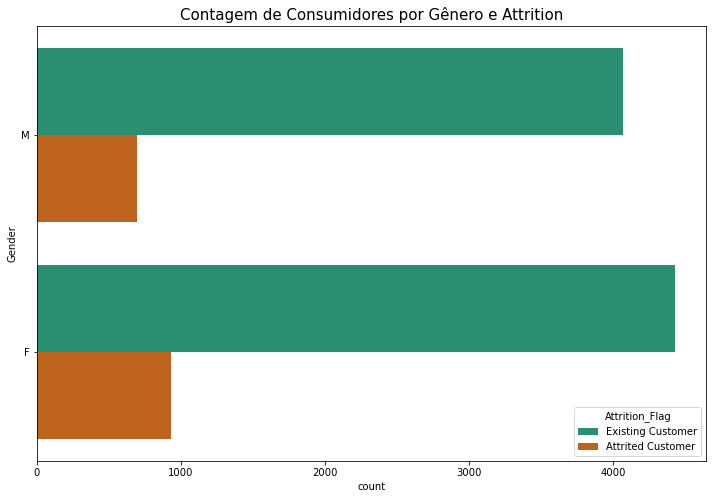

In [11]:
# Não parece haver diferença entre homens e mulheres no Attrition
sns.set_palette("Dark2")
plt.figure(figsize = (12,8))
plt.title("Contagem de Consumidores por Gênero e Attrition", fontsize = 15)
sns.countplot(data=bank, y='Gender', hue="Attrition_Flag");

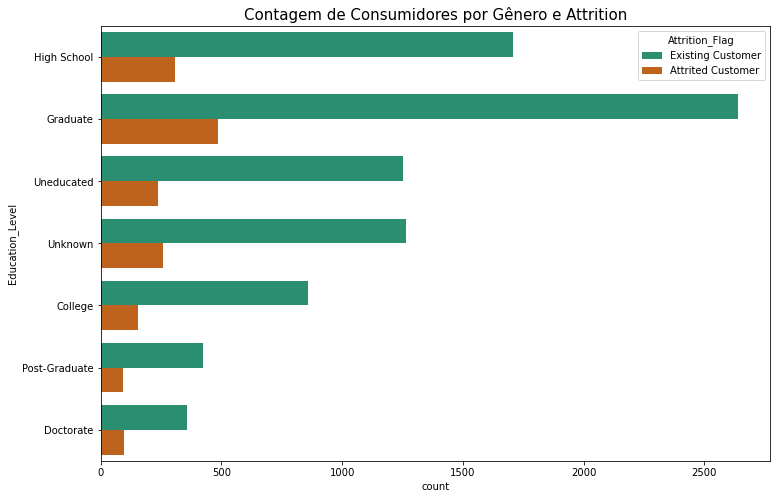

In [12]:
plt.figure(figsize = (12,8))
plt.title("Contagem de Consumidores por Gênero e Attrition", fontsize = 15)
sns.countplot(data=bank, y='Education_Level', hue="Attrition_Flag");

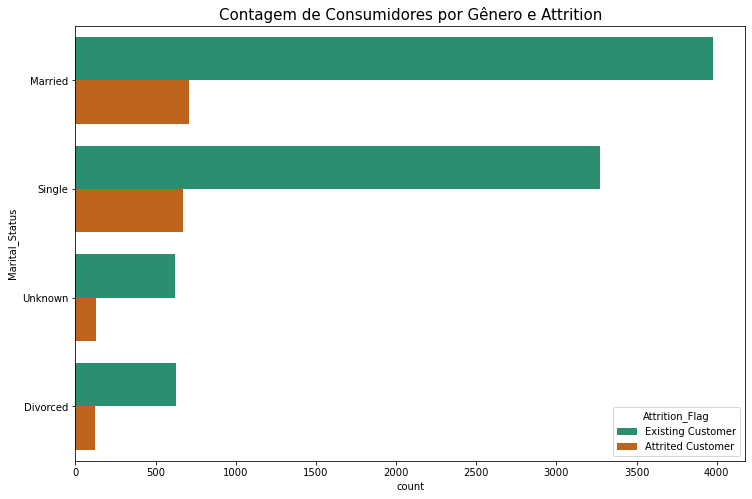

In [13]:
plt.figure(figsize = (12,8))
plt.title("Contagem de Consumidores por Gênero e Attrition", fontsize = 15)
sns.countplot(data=bank, y='Marital_Status', hue="Attrition_Flag");

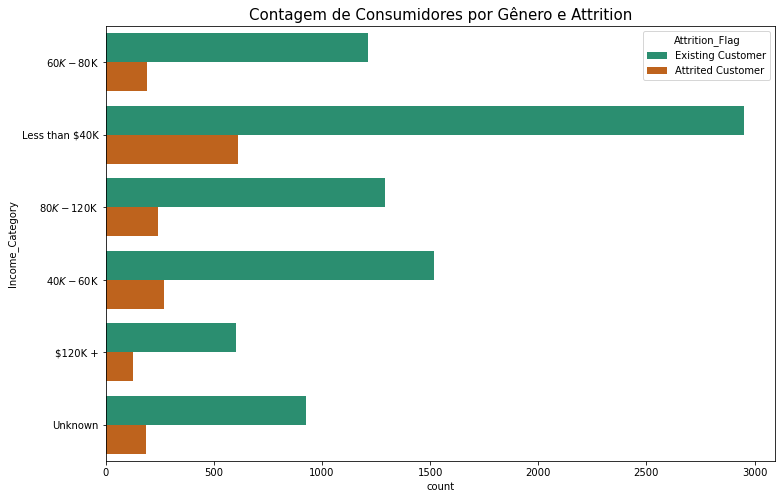

In [14]:
plt.figure(figsize = (12,8))
plt.title("Contagem de Consumidores por Gênero e Attrition", fontsize = 15)
sns.countplot(data=bank, y='Income_Category', hue="Attrition_Flag");

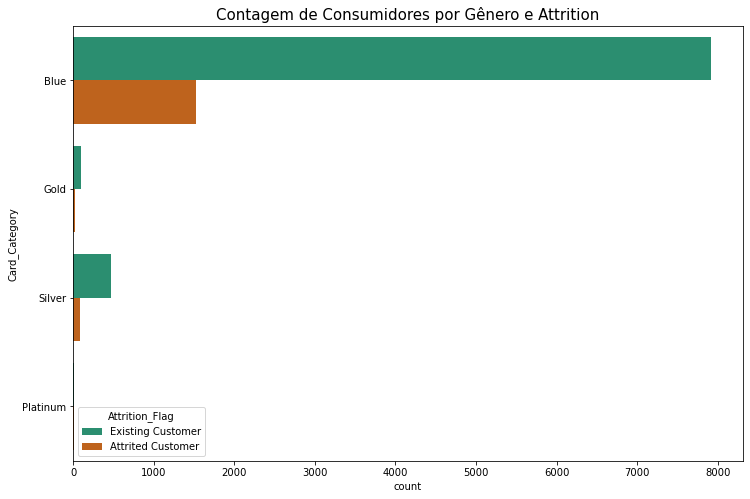

In [15]:
plt.figure(figsize = (12,8))
plt.title("Contagem de Consumidores por Gênero e Attrition", fontsize = 15)
sns.countplot(data=bank, y='Card_Category', hue="Attrition_Flag");

Não parece haver nenhuma relação clara entre as variáveis categóricas e os clientes com attrition.

In [17]:
bank.drop('CLIENTNUM', inplace = True, axis = 1)

In [18]:
att_df = bank[bank['Attrition_Flag'] == "Attrited Customer"]
exist_df = bank[bank['Attrition_Flag'] == "Existing Customer"]

In [19]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

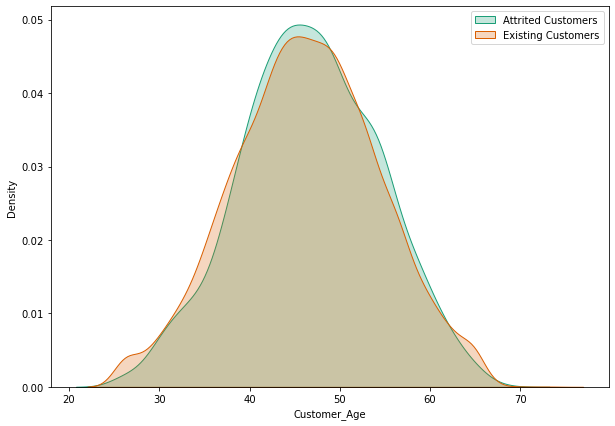

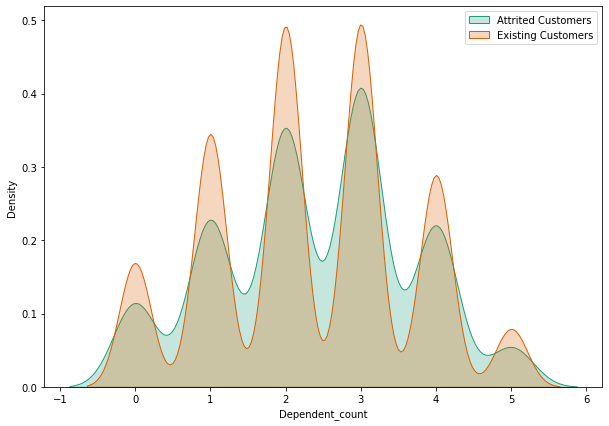

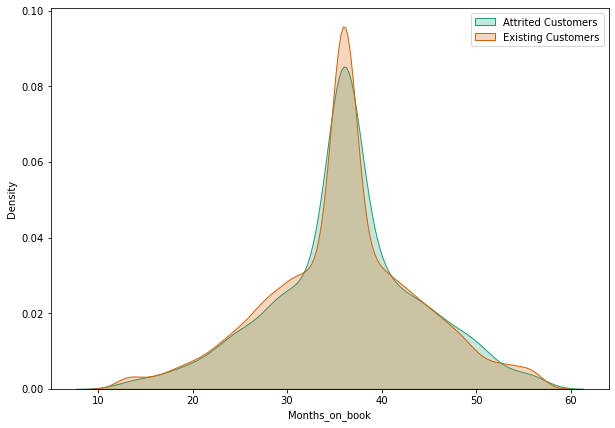

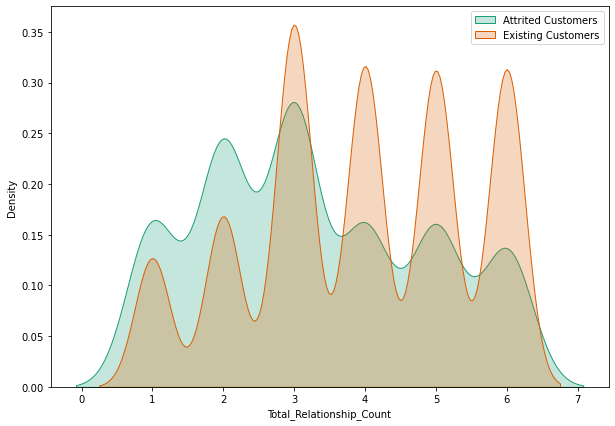

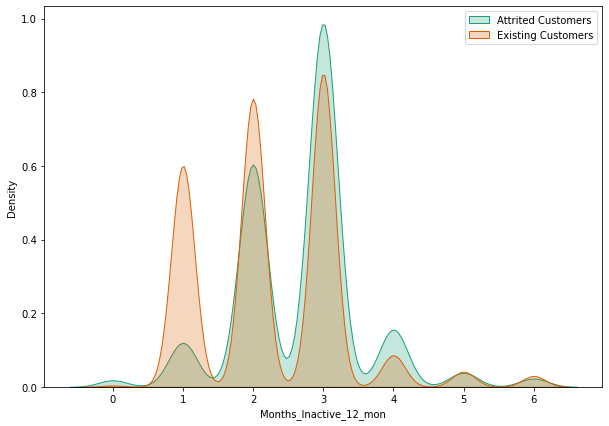

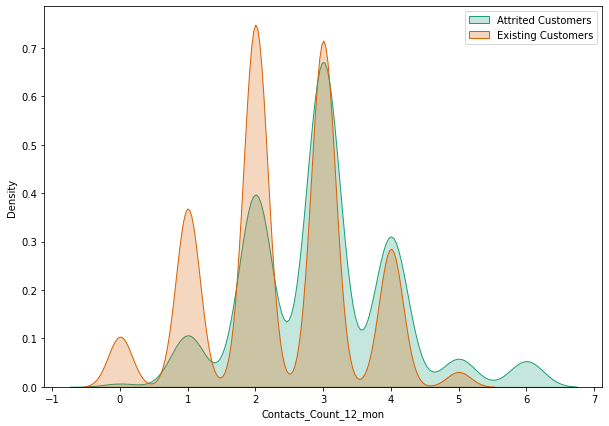

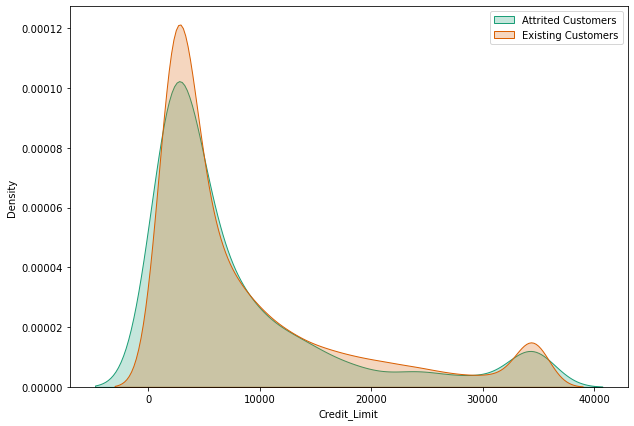

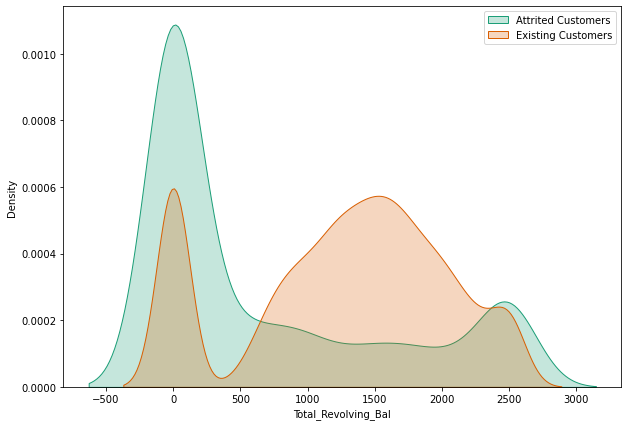

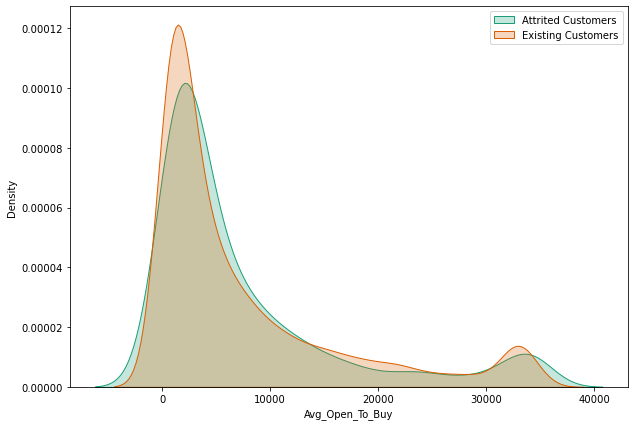

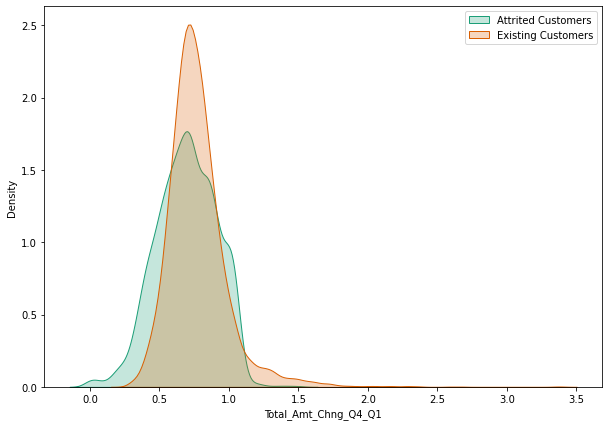

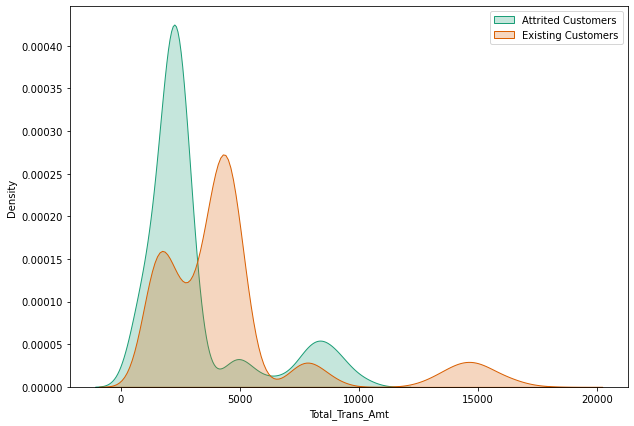

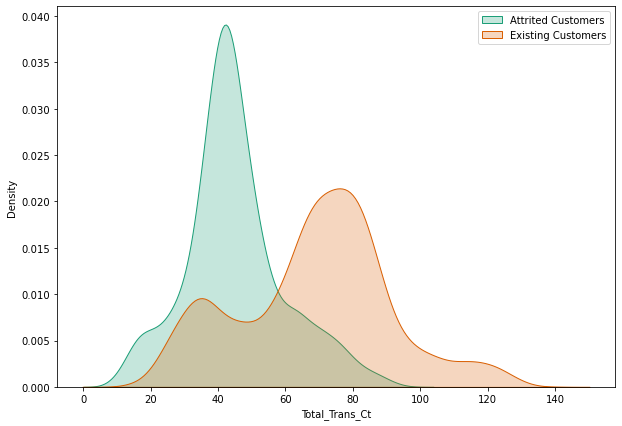

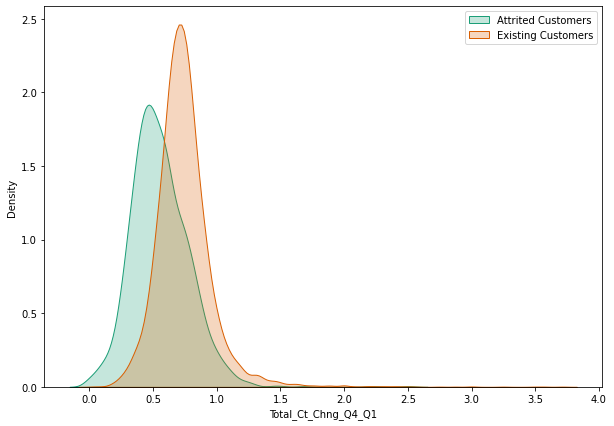

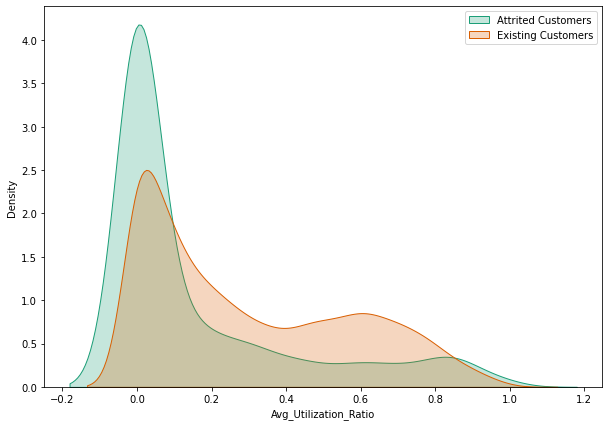

In [20]:
for column in bank.select_dtypes('number').columns:
    plt.figure(figsize = (10,7))
    sns.kdeplot(att_df[column], shade = True, label = "Attrited Customers")
    sns.kdeplot(exist_df[column], shade = True, label = "Existing Customers")
    plt.legend()

Comparando as análises de densidade de clientes existentes e clientes com atrito das variáveis numéricas, parece que clientes que tem atrito com o banco possuem as seguintes características: 
* Possuem menos de 3 produtos do banco (Total_Relashionship_Count);
* Ficam mais tempo inativos e sem contatar o banco (Months_Inactive_12_mon e Contacts_Count_12_mon;
* Possuem um valor menor de crédito retroativo (entre -500 e 500) ou possuem um valor muito alto (acima de 2500);
* Possuem um valor total de transações nos últimos 12 meses (Total_Trans_Amt) e uma quantidade de transações (Total_Trans_Count) menor;
* Possuem uma menor difrença em quantidade de transações (Total_Ct_Chng_Q4_Q1);
* Possuem uma menor média de utilização do cartão de crédito (Avg_Utilization_Ratio);

Com essas informações, podemos entender que um cliente que fecha sua conta provavelmente utiliza pouco o cartão de crédito (ou não usa, dado os meses inativo), provavelmente por não ter necessidade do serviço ou não realizar grandes compras. É claro que esse é um panorama geral e não contemplam todos os clientes, já que também temos clientes com alta atividade que fecham suas contas. 

## Modelo 01 
### Trabalhando com modelo de Gradient Boosting

##### Sem pipeline

In [22]:
from sklearn.model_selection import train_test_split
from category_encoders import OneHotEncoder
from sklearn.model_selection import KFold 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, roc_auc_score

In [23]:
bank_dummies = pd.get_dummies(bank.select_dtypes(exclude='number'))
bank_dummies

,Attrition_Flag_Attrited Customer,Attrition_Flag_Existing Customer,Gender_F,Gender_M,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,1,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,0,1,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
4,0,1,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,1,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
10123,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
10124,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
10125,1,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [24]:
merged_bank = pd.concat([bank,bank_dummies], axis = 1)
merged_bank

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,...,0,0,1,0,0,0,1,0,0,0
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,...,0,0,0,0,1,0,1,0,0,0
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,...,0,0,0,1,0,0,1,0,0,0
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,...,0,0,0,0,1,0,1,0,0,0
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,...,0,1,0,0,0,0,1,0,0,0
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,...,0,1,0,0,0,0,1,0,0,0
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,...,0,0,0,0,1,0,1,0,0,0
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,...,0,1,0,0,0,0,1,0,0,0


In [25]:
bank_dummies.columns

Index(['Attrition_Flag_Attrited Customer', 'Attrition_Flag_Existing Customer',
       'Gender_F', 'Gender_M', 'Education_Level_College',
       'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Education_Level_Unknown',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Unknown',
       'Income_Category_$120K +', 'Income_Category_$40K - $60K',
       'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K',
       'Income_Category_Less than $40K', 'Income_Category_Unknown',
       'Card_Category_Blue', 'Card_Category_Gold', 'Card_Category_Platinum',
       'Card_Category_Silver'],
      dtype='object')

In [26]:
final_bank = merged_bank.drop(['Customer_Age','Gender','Education_Level','Marital_Status',
                              'Income_Category','Card_Category','Income_Category_Unknown','Card_Category_Blue',
                              'Attrition_Flag_Existing Customer', 'Gender_F', 'Education_Level_Uneducated',
                               'Marital_Status_Unknown','Attrition_Flag'], axis = 1)
final_bank

,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,...,Marital_Status_Married,Marital_Status_Single,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,...,1,0,0,0,1,0,0,0,0,0
1,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,...,0,1,0,0,0,0,1,0,0,0
2,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,...,1,0,0,0,0,1,0,0,0,0
3,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,...,0,0,0,0,0,0,1,0,0,0
4,3,21,5,1,0,4716.0,0,4716.0,2.175,816,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,2,40,3,2,3,4003.0,1851,2152.0,0.703,15476,...,0,1,0,1,0,0,0,0,0,0
10123,2,25,4,2,3,4277.0,2186,2091.0,0.804,8764,...,0,0,0,1,0,0,0,0,0,0
10124,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,...,1,0,0,0,0,0,1,0,0,0
10125,2,36,4,3,3,5281.0,0,5281.0,0.535,8395,...,0,0,0,1,0,0,0,0,0,0


In [27]:
X = final_bank.drop('Attrition_Flag_Attrited Customer', axis = 1)
y = final_bank['Attrition_Flag_Attrited Customer']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)

In [28]:
gradient = GradientBoostingClassifier()

In [29]:
gradient.fit(X_train,y_train)

GradientBoostingClassifier()

In [31]:
skfold = StratifiedKFold(n_splits = 10, shuffle = True)
scoring = {'ROC': 'roc_auc', 'AUC':'roc_auc_ovr', 'f1': 'f1'}

In [32]:
results_grad = pd.DataFrame(cross_validate(gradient, X = X_train, y = y_train, cv = skfold,
                                          scoring=scoring))

In [34]:
results_grad

,fit_time,score_time,test_ROC,test_AUC,test_f1
0,1.643455,0.011574,0.988277,0.988277,0.862385
1,1.555548,0.016382,0.984826,0.984826,0.866071
2,1.531710,0.016250,0.989778,0.989778,0.897436
3,1.535247,0.010419,0.988638,0.988638,0.889908
4,1.540409,0.012538,0.982126,0.982126,0.864865
5,1.555303,0.011437,0.994557,0.994557,0.896861
6,1.547636,0.011116,0.990053,0.990053,0.868778
7,1.549807,0.008843,0.991886,0.991886,0.916300
8,1.537287,0.012338,0.986297,0.986297,0.896861
9,1.541434,0.010356,0.983749,0.983749,0.871560


In [35]:
results_grad.mean()

fit_time      1.553783
score_time    0.012125
test_ROC      0.988019
test_AUC      0.988019
test_f1       0.883103
dtype: float64

###### Resultados e Avaliação do modelo de GB

In [84]:
y_pred_grad = gradient.predict(X_test)

In [85]:
from sklearn.metrics import confusion_matrix, classification_report

In [90]:
cf_grad_1 = confusion_matrix(y_test, y_pred_grad)
cf_grad_1

array([[2546,   34],
       [  85,  374]], dtype=int64)

In [93]:
cr_grad_1 = print(classification_report(y_test, y_pred_grad))
cr_grad_1

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2580
           1       0.92      0.81      0.86       459

    accuracy                           0.96      3039
   macro avg       0.94      0.90      0.92      3039
weighted avg       0.96      0.96      0.96      3039



##### Com Pipeline

In [36]:
Xp = bank.drop("Attrition_Flag", axis = 1)
yp = bank['Attrition_Flag']

In [37]:
Xp_train, Xp_test, yp_train, yp_test = train_test_split(X,y,test_size = 0.25)

In [38]:
bank_pipeline = Pipeline(steps=[
    ('ohe', OneHotEncoder()),
    ('model', GradientBoostingClassifier())
])

In [39]:
bank_pipeline.fit(Xp_train, yp_train)

Pipeline(steps=[('ohe', OneHotEncoder(cols=[])),
                ('model', GradientBoostingClassifier())])

In [40]:
scoring

{'ROC': 'roc_auc', 'AUC': 'roc_auc_ovr', 'f1': 'f1'}

In [41]:
skfold

StratifiedKFold(n_splits=10, random_state=None, shuffle=True)

In [42]:
results_bank_pipe = pd.DataFrame(cross_validate(bank_pipeline, X=Xp_train, y=yp_train, cv= skfold,
                                               scoring = scoring))

In [43]:
results_bank_pipe.mean()

fit_time      1.691779
score_time    0.011993
test_ROC      0.988802
test_AUC      0.988802
test_f1       0.878216
dtype: float64

In [120]:
ypred_grad_pipe = bank_pipeline.predict(Xp_test)

In [122]:
cf_grad_2 = confusion_matrix(yp_test, ypred_grad_pipe)
cf_grad_2

array([[2085,   31],
       [  67,  349]], dtype=int64)

In [123]:
cr_grad_2 = print(classification_report(yp_test, ypred_grad_pipe))
cr_grad_2

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2116
           1       0.92      0.84      0.88       416

    accuracy                           0.96      2532
   macro avg       0.94      0.91      0.93      2532
weighted avg       0.96      0.96      0.96      2532



Ao introduzirmos o pipeline não era esperada uma melhora na capacidade preditiva do modelo, mas uma redução no número de linhas e uma facilidade nos códigos.

#### Tuning hyperparameters

Agora vamos procurar melhorar o modelo escolhendo os melhores parâmetros dentro da metodologia de Gradient Boosting.

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

In [49]:
# Vamos tentar otimizar os parâmetros de n_estimators e learning_rate do modelo dentro dos valores que demos abaixo:

param = {'n_estimators': [250,200,150,100], 'learning_rate': [0.15,0.1,0.05]}

In [124]:
grid = GridSearchCV(GradientBoostingClassifier(), param_grid = param, scoring = scoring, cv = skfold, refit = 'f1')
grid.fit(Xp_train, yp_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True),
             estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.15, 0.1, 0.05],
                         'n_estimators': [250, 200, 150, 100]},
             refit='f1',
             scoring={'AUC': 'roc_auc_ovr', 'ROC': 'roc_auc', 'f1': 'f1'})

In [125]:
grid.best_params_

{'learning_rate': 0.15, 'n_estimators': 250}

In [126]:
n_est = grid.best_params_['n_estimators']
l_rate = grid.best_params_['learning_rate']

In [127]:
bank_pipeline_gs = Pipeline(steps=[
    ('ohe', OneHotEncoder()),
    ('model', GradientBoostingClassifier(n_estimators = n_est, learning_rate = l_rate)
    )])

In [128]:
bank_pipeline_gs.fit(Xp_train, yp_train)

Pipeline(steps=[('ohe', OneHotEncoder(cols=[])),
                ('model',
                 GradientBoostingClassifier(learning_rate=0.15,
                                            n_estimators=250))])

In [129]:
bank_pipeline_gs_results = pd.DataFrame(cross_validate(bank_pipeline_gs, Xp_train, yp_train, cv = skfold,
                                                      scoring = scoring))

In [82]:
bank_pipeline_gs_results.mean()

fit_time      4.137957
score_time    0.016796
test_ROC      0.993199
test_AUC      0.993199
test_f1       0.904100
dtype: float64

In [130]:
y_pred_gs = bank_pipeline_gs.predict(Xp_test)

In [148]:
cf_grad_3 = confusion_matrix(yp_test,y_pred_gs)
cf_grad_3

array([[2084,   32],
       [  49,  367]], dtype=int64)

In [149]:
cr_grad_3 = print(classification_report(yp_test,y_pred_gs))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2116
           1       0.92      0.88      0.90       416

    accuracy                           0.97      2532
   macro avg       0.95      0.93      0.94      2532
weighted avg       0.97      0.97      0.97      2532



No modelo com otimização de parâmetros obtivemos uma melhora nas métricas de avaliação utilizadas. principalmente quando comparamos a capacidade do modelo de prever eventos da classe 1 (quando um cliente vai fechar a conta).

## Modelo 02
### Trabalhando com RandomForest 

In [134]:
from sklearn.ensemble import RandomForestClassifier

In [135]:
params_rfc = {'n_estimators': [250, 200, 150, 100],  'criterion': ['gini', 'entropy']}

In [136]:
rfc_grid = GridSearchCV(RandomForestClassifier(), param_grid = params_rfc, scoring = scoring, cv = skfold, refit = 'f1')
rfc_grid.fit(Xp_train, yp_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [250, 200, 150, 100]},
             refit='f1',
             scoring={'AUC': 'roc_auc_ovr', 'ROC': 'roc_auc', 'f1': 'f1'})

In [137]:
best_rfc = rfc_grid.best_params_
best_rfc

{'criterion': 'gini', 'n_estimators': 200}

In [138]:
best_rfc_crit = best_rfc['criterion']
best_rfc_est = best_rfc['n_estimators']

In [139]:
rfc_pipe = Pipeline(steps=[
    ('ohe', OneHotEncoder()),
    ('model', RandomForestClassifier(n_estimators = best_rfc_est, criterion = best_rfc_crit))
])

In [140]:
rfc_pipe.fit(Xp_train, yp_train)

Pipeline(steps=[('ohe', OneHotEncoder(cols=[])),
                ('model', RandomForestClassifier(n_estimators=200))])

In [141]:
rfc_results = pd.DataFrame(cross_validate(rfc_pipe, Xp_train, yp_train, cv = skfold,
                                         scoring = scoring))

In [142]:
rfc_results.mean()

fit_time      1.627112
score_time    0.077898
test_ROC      0.986583
test_AUC      0.986583
test_f1       0.844899
dtype: float64

In [143]:
ypred_rfc = rfc_pipe.predict(Xp_test)

In [151]:
cf_rfc = confusion_matrix(yp_test, ypred_rfc)
cf_rfc

array([[2088,   28],
       [  91,  325]], dtype=int64)

In [153]:
cr_rfc = print(classification_report(yp_test, ypred_rfc))
cr_rfc

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      2116
           1       0.92      0.78      0.85       416

    accuracy                           0.95      2532
   macro avg       0.94      0.88      0.91      2532
weighted avg       0.95      0.95      0.95      2532



## Conclusão
Pelos resultados, o modelo de GradientBoosting tem um resultado melhor, portanto em um eventual deploy para que o banco possa utilizar ele na previsão de clientes que irão sair, seria o modelo escolhido. 